# This notebook reproduces the main results in Figure 4 and its associated Supplementary Figures.

In [1]:
library(Seurat)
library(SeuratWrappers)
library(harmony)
library(batchelor)

Attaching SeuratObject

Loading required package: Rcpp

Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs

Load the Seurat object.

In [2]:
immune <- readRDS('Immune_benchmark.RDS')
immune

An object of class Seurat 
1740 features across 417866 samples within 1 assay 
Active assay: RNA (1740 features, 0 variable features)
 1 dimensional reduction calculated: pca

Counts, normalised expression, and scaled expression are in `$RNA@counts`, `$RNA@data`, and `$RNA@scale.data`, respectively. Only HVGs (n = 1740) are kept for each slot. `$pca@cell.embeddings` is calculated directly based on scaled expression.

In [3]:
dim(immune)

[1]   1740 417866

In [4]:
head(immune$pca@cell.embeddings)

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,⋯,PC_41,PC_42,PC_43,PC_44,PC_45,PC_46,PC_47,PC_48,PC_49,PC_50
FCAImmP7179363_AAGGCAGGTCCGAGTC-1-popescu19,5.416077,-6.0498362,10.968814,9.143096,1.86473703,19.38028,-6.667823,-4.06973362,3.454499,7.794345,⋯,-3.4528303,-2.185286,1.380609,-2.1336651,0.74454695,-0.4717946,1.2613487,1.1680659,1.6899846,0.07921237
FCAImmP7179363_ACACCAAGTGCAGTAG-1-popescu19,7.057451,-3.0223880,10.836546,7.326011,1.52235210,20.29700,-10.833186,0.07486933,10.856373,18.561970,⋯,0.5812054,-3.173053,2.312178,0.1333792,0.55594981,1.5963440,-0.4441859,0.7843529,0.3136022,0.81404877
FCAImmP7179363_ACACCCTGTGTGGCTC-1-popescu19,4.386515,-4.7069697,8.621740,6.324101,-0.26655400,14.55744,-7.349488,-0.10442275,12.203967,14.867605,⋯,-6.7907605,-4.453097,2.546577,-1.8103009,-1.97028804,1.5208590,3.8420572,-0.5395530,0.2817632,1.42735469
FCAImmP7179363_ACGGAGATCCTCATTA-1-popescu19,6.217113,-1.1354387,5.774805,4.606223,-0.42209879,10.48193,-7.384690,2.89863539,14.715957,21.433641,⋯,-2.3959765,-3.820570,2.024290,0.3368653,-1.88660371,3.9220629,1.0426496,-1.3027308,0.5401683,1.19695425
FCAImmP7179363_AGAGCTTCATGTTCCC-1-popescu19,6.166337,-0.1343326,6.836470,3.671364,-0.08204001,10.36803,-7.498146,3.81424642,14.093477,22.637327,⋯,-2.4594655,-4.993604,3.387558,-2.1972404,-1.68626940,3.2642035,0.9631574,-1.9976892,-0.2863128,1.71254468
FCAImmP7179363_ATGCGATAGGTGATAT-1-popescu19,7.031715,-4.7782269,10.405839,8.502954,1.51264346,19.08922,-8.479601,-2.14026594,10.629246,16.902018,⋯,-6.1696877,-1.815609,1.412498,-2.9124920,0.07820153,1.6690991,1.4457631,0.5992208,2.4982767,-0.51347858


In [5]:
head(immune[[]])

,Harmonised_broad_type,Harmonised_detailed_type,Label_from_original_study,Tissue,Dataset,Protocol,Iteration,High_hierarchy,Low_hierarchy,nCount_RNA,nFeature_RNA
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>
FCAImmP7179363_AAGGCAGGTCCGAGTC-1-popescu19,Mast cells,Mast cells,Mast cell,Liver,Popescu et al. 2019,10X,1,Group49,UNRESOLVED = UNRESOLVED = UNRESOLVED = UNRESOLVED = Mast cell,6069,351
FCAImmP7179363_ACACCAAGTGCAGTAG-1-popescu19,Mast cells,Mast cells,Mast cell,Liver,Popescu et al. 2019,10X,1,Group49,UNRESOLVED = UNRESOLVED = UNRESOLVED = UNRESOLVED = Mast cell,3537,297
FCAImmP7179363_ACACCCTGTGTGGCTC-1-popescu19,Mast cells,Mast cells,Mast cell,Liver,Popescu et al. 2019,10X,1,Group49,UNRESOLVED = UNRESOLVED = UNRESOLVED = UNRESOLVED = Mast cell,4169,297
FCAImmP7179363_ACGGAGATCCTCATTA-1-popescu19,Mast cells,Mast cells,Mast cell,Liver,Popescu et al. 2019,10X,1,Group49,UNRESOLVED = UNRESOLVED = UNRESOLVED = UNRESOLVED = Mast cell,2298,241
FCAImmP7179363_AGAGCTTCATGTTCCC-1-popescu19,Mast cells,Mast cells,Mast cell,Liver,Popescu et al. 2019,10X,1,Group49,UNRESOLVED = UNRESOLVED = UNRESOLVED = UNRESOLVED = Mast cell,1724,227
FCAImmP7179363_ATGCGATAGGTGATAT-1-popescu19,Mast cells,Mast cells,Mast cell,Liver,Popescu et al. 2019,10X,1,Group49,UNRESOLVED = UNRESOLVED = UNRESOLVED = UNRESOLVED = Mast cell,4985,342


## FastMNN

In [11]:
seurat <- DietSeurat(immune, counts = FALSE, data = TRUE, scale.data = FALSE)

In [ ]:
t_start <- Sys.time()
seurat <- RunFastMNN(SplitObject(seurat, split.by = 'Dataset'), features = rownames(seurat))
seurat <- FindNeighbors(seurat, dims = 1:50, reduction = "mnn")
t_end <- Sys.time()
seurat <- RunUMAP(seurat, reduction = "mnn", dims = 1:50, seed.use = 998)
write.table(seurat@reductions$umap@cell.embeddings, file = 'fast_mnn.csv', sep = ',', quote = FALSE, row.names = TRUE, col.names = TRUE)
print(paste0("Time elapsed: ", as.numeric(t_end - t_start, units = "secs"), ' seconds'))

_Due to the high demand of runtime and memory, the above commands are submitted in job queues in practice. We load the resulting embeddings and visualise it._

In [12]:
umaps = read.table('fast_mnn.csv', sep = ',', row.names = 1, as.is = TRUE, header = TRUE)
seurat$umap = CreateDimReducObject(embeddings = as.matrix(umaps[colnames(seurat),]), key = "UMAP_")

Warning message:
“No assay specified, setting assay as RNA by default.”


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



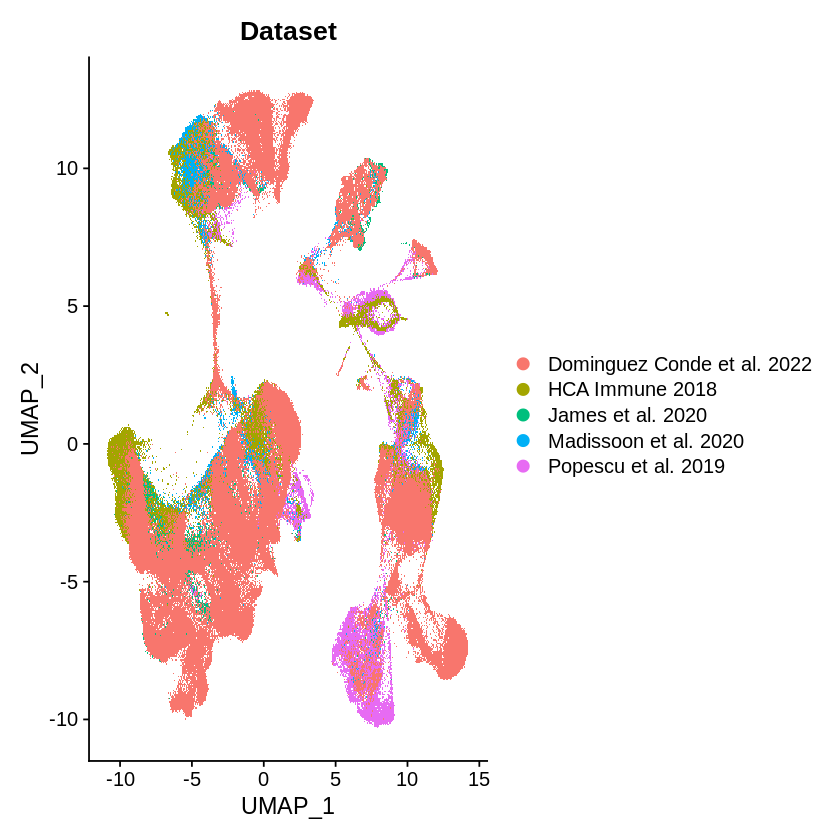

In [13]:
DimPlot(seurat, group.by = 'Dataset')

# Harmony

In [14]:
seurat <- DietSeurat(immune, counts = FALSE, data = TRUE, scale.data = TRUE, dimreducs = 'pca')

In [ ]:
t_start <- Sys.time()
seurat <- RunHarmony(seurat, 'Dataset')
seurat <- FindNeighbors(seurat, dims = 1:50, reduction = "harmony")
t_end <- Sys.time()
seurat <- RunUMAP(seurat, dims = 1:50, seed.use = 998, reduction = "harmony")
write.table(seurat@reductions$umap@cell.embeddings, file = 'harmony_pca.csv', sep = ',', quote = FALSE, row.names = TRUE, col.names = TRUE)
print(paste0("Time elapsed: ", as.numeric(t_end - t_start, units = "secs"), ' seconds'))

In [15]:
umaps = read.table('harmony_pca.csv', sep = ',', row.names = 1, as.is = TRUE, header = TRUE)
seurat$umap = CreateDimReducObject(embeddings = as.matrix(umaps[colnames(seurat),]), key = "UMAP_")

Warning message:
“No assay specified, setting assay as RNA by default.”


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



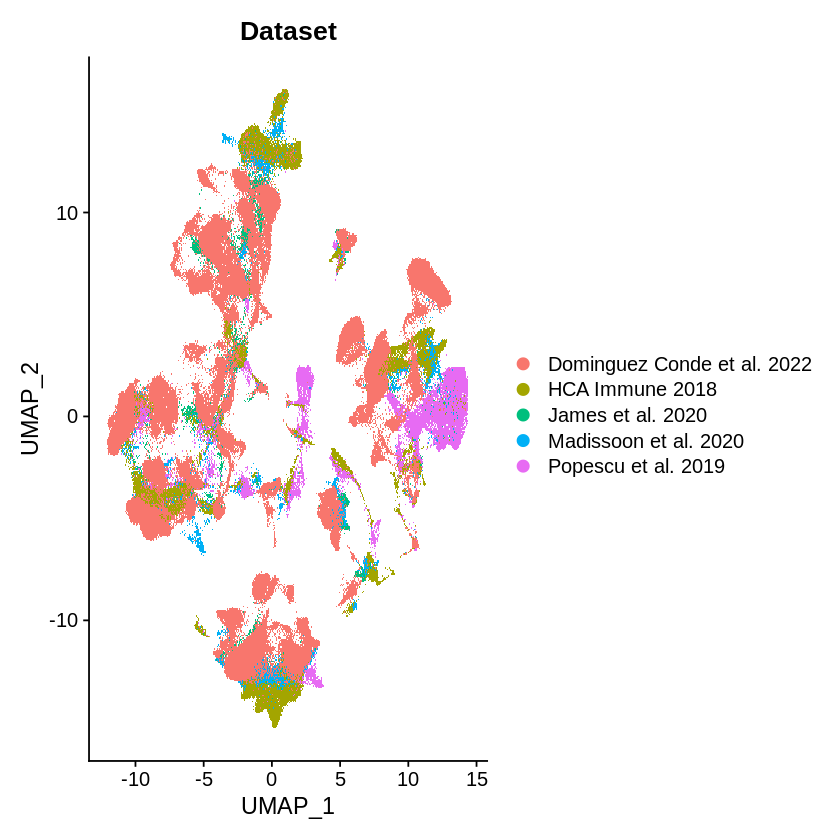

In [16]:
DimPlot(seurat, group.by = 'Dataset')

# Seurat

In [17]:
seurat <- DietSeurat(seurat, counts = FALSE, data = TRUE, scale.data = FALSE)

In [ ]:
seurat_list <- SplitObject(seurat, split.by = 'Dataset')
seurat_list <- lapply(seurat_list, ScaleData)
seurat_list <- seurat_list[c('James et al. 2020', 'Madissoon et al. 2020', 'Popescu et al. 2019', 'HCA Immune 2018', 'Dominguez Conde et al. 2022')]

In [ ]:
t_start <- Sys.time()
anchors <- FindIntegrationAnchors(seurat_list, normalization.method = 'LogNormalize', anchor.features = rownames(seurat), scale = FALSE, dims = 1:50, reference = length(seurat_list))
seurat <- IntegrateData(anchors, normalization.method = 'LogNormalize', dims = 1:50)
seurat <- ScaleData(seurat)
seurat <- RunPCA(seurat, npcs = 50, seed.use = 998)
seurat <- FindNeighbors(seurat, dims = 1:50)
t_end <- Sys.time()
seurat <- RunUMAP(seurat, dims = 1:50, seed.use = 998)
write.table(seurat@reductions$umap@cell.embeddings, file = 'seurat_cca.csv', sep = ',', quote = FALSE, row.names = TRUE, col.names = TRUE)
print(paste0("Time elapsed: ", as.numeric(t_end - t_start, units = "secs"), ' seconds'))

In [18]:
umaps = read.table('seurat_cca.csv', sep = ',', row.names = 1, as.is = TRUE, header = TRUE)
seurat$umap = CreateDimReducObject(embeddings = as.matrix(umaps[colnames(seurat),]), key = "UMAP_")

Warning message:
“No assay specified, setting assay as RNA by default.”


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



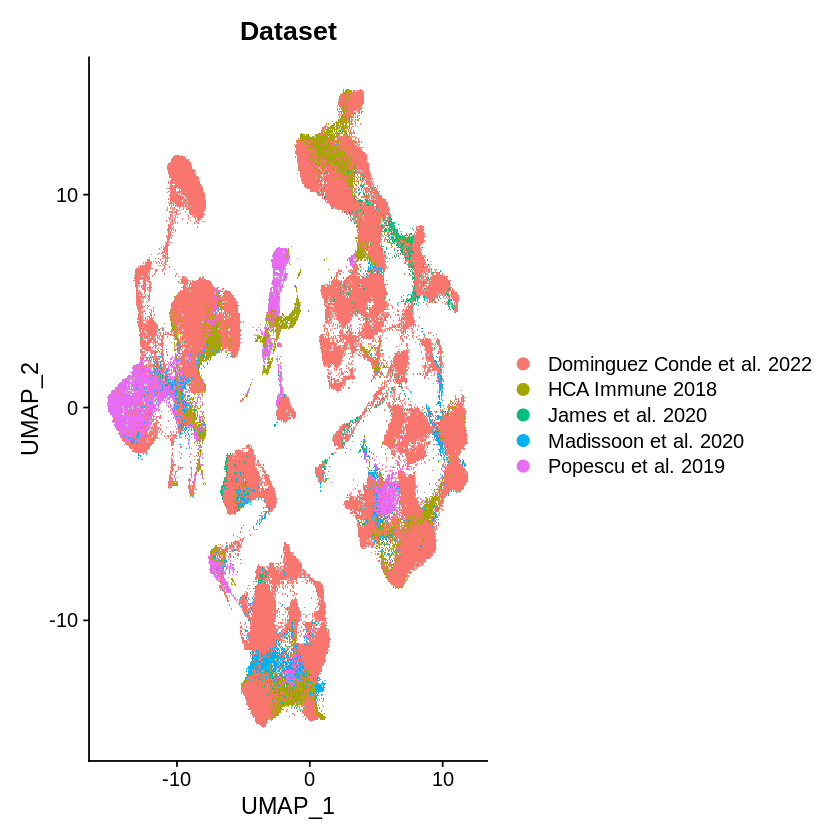

In [19]:
DimPlot(seurat, group.by = 'Dataset')